In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#import sys
#!{sys.executable} -m pip install -r requirements.txt

In [3]:
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta

# just set the seed for the random number generator
#np.random.seed(107)

In [4]:
# Change...
pair = 'BTCUSDT'

# interval used to compute indicators and backtest analysis
# valid strategy intervals - 1min, 3min, 5min, 15min, 30min, 1H, 2H, 4H, 6H, 8H, 12H, 1D, 3D, 1W, 1M
strategy_interval = '1H'
# date to start/end analysis
dt_start_analysis = '2021-1-1'
# Use '' for analysis until now
dt_end_analysis = ''


In [5]:
from binance_utils import init
from trade_utils import get_data

client = init()
data = get_data(client, pair, strategy_interval)

In [6]:
data.shape

(34850, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34850 entries, 2017-08-17 04:00:00 to 2021-08-13 12:00:00
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OpenPrice   34850 non-null  float64
 1   HighPrice   34850 non-null  float64
 2   LowPrice    34850 non-null  float64
 3   ClosePrice  34850 non-null  float64
 4   Volume      34850 non-null  float64
dtypes: float64(5)
memory usage: 1.6 MB


In [8]:
data.head()

OpenPrice  HighPrice  LowPrice  ClosePrice     Volume
OpenTime                                                                  
2017-08-17 04:00:00    4261.48    4313.62   4261.32     4308.83  47.181009
2017-08-17 05:00:00    4308.83    4328.69   4291.37     4315.32  23.234916
2017-08-17 06:00:00    4330.29    4345.45   4309.37     4324.35   7.229691
2017-08-17 07:00:00    4316.62    4349.99   4287.41     4349.99   4.443249
2017-08-17 08:00:00    4333.32    4377.85   4333.32     4360.69   0.972807

In [9]:
data.tail()

OpenPrice  HighPrice  LowPrice  ClosePrice       Volume
OpenTime                                                                    
2021-08-13 08:00:00   46103.50   46323.62  45959.90    46161.01  3063.926693
2021-08-13 09:00:00   46161.01   46449.82  46132.39    46216.18  2987.879232
2021-08-13 10:00:00   46216.83   46474.34  46216.83    46293.25  1862.498609
2021-08-13 11:00:00   46293.25   46537.15  46111.00    46138.47  2476.349281
2021-08-13 12:00:00   46138.46   46266.11  46128.18    46261.11   307.115521

In [10]:
data.sample(10)

OpenPrice  HighPrice  LowPrice  ClosePrice       Volume
OpenTime                                                                    
2020-09-12 09:00:00   10333.20   10356.80  10325.00    10354.29  1200.134001
2018-11-26 09:00:00    4055.00    4065.59   3971.48     4017.03  3227.208791
2021-03-21 14:00:00   57021.95   57320.66  57000.05    57177.37  1476.549534
2018-09-13 15:00:00    6493.61    6496.25   6467.00     6480.00  1087.314513
2018-05-25 06:00:00    7622.01    7649.55   7451.56     7482.98  1817.925143
2021-04-21 20:00:00   55478.70   55481.16  54777.00    54956.93  2590.887802
2019-02-08 23:00:00    3633.64    3665.00   3630.60     3659.04  1099.696244
2018-12-06 02:00:00    3786.97    3796.05   3735.66     3746.10  1610.424821
2019-11-23 03:00:00    7249.64    7292.51   7232.18     7271.94  1363.847699
2018-04-30 10:00:00    9219.97    9281.99   9175.99     9264.80  1108.923507

In [11]:
from technical_indicator_utils import sma, ema, macd, rsi, adx, bbands

# Calculate returns
data['Returns'] = data['ClosePrice'].pct_change() * 100 # pct_change() = percent change from previous price
data['Returns2'] = data['ClosePrice'].pct_change(2) * 100 # change from 2 previous price
data['Returns5'] = data['ClosePrice'].pct_change(5) * 100 # change from 5 previous price

# Volatility
data['volatility'] = data.rolling(24, min_periods = 24)['Returns'].std() * 100

# SMA
data['SMA5'] = sma(data['ClosePrice'], 5)
data['SMA10'] = sma(data['ClosePrice'], 10)
data['SMA20'] = sma(data['ClosePrice'], 20)
data['SMA30'] = sma(data['ClosePrice'], 30)
data['SMA50'] = sma(data['ClosePrice'], 50)
data['SMA100'] = sma(data['ClosePrice'], 100)
data['SMA200'] = sma(data['ClosePrice'], 200)

# EMA
data['EMA5'] = ema(data['ClosePrice'], 5)
data['EMA10'] = ema(data['ClosePrice'], 10)
data['EMA20'] = ema(data['ClosePrice'], 20)
data['EMA30'] = ema(data['ClosePrice'], 30)
data['EMA50'] = ema(data['ClosePrice'], 50)
data['EMA100'] = ema(data['ClosePrice'], 100)
data['EMA200'] = ema(data['ClosePrice'], 200)

# MACD
data['MACD'], data['MACDSignal'], data['MACDHist'] = macd(data.ClosePrice)

# RSI
data['RSI'] = rsi(data.ClosePrice)

# ADX
data['DI+'], data['DI-'], data['ADX'] = adx(data.HighPrice, data.LowPrice, data.ClosePrice)

# Bollinger Bands
data['UpperBBand'], data['MidiBBand'], data['LowerBBand'] = bbands(data.ClosePrice)

In [12]:
#limit data to plot
if dt_end_analysis == '':
    data = data[dt_start_analysis:]
else:
    data = data[dt_start_analysis:dt_end_analysis]

In [13]:
from technical_indicator_utils import fibonacci_retracement_levels

# Fibonacci retracement
fib_levels = fibonacci_retracement_levels(data['ClosePrice'].max(), data['ClosePrice'].min())

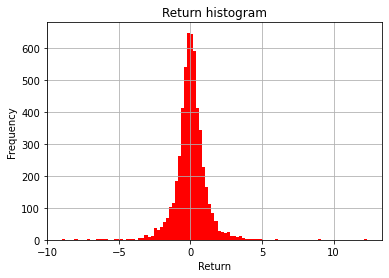

In [14]:
# Plot the histogram
data['Returns'].hist(bins=100, color='red')
plt.ylabel('Frequency')
plt.xlabel('Return')
plt.title('Return histogram')
plt.show()

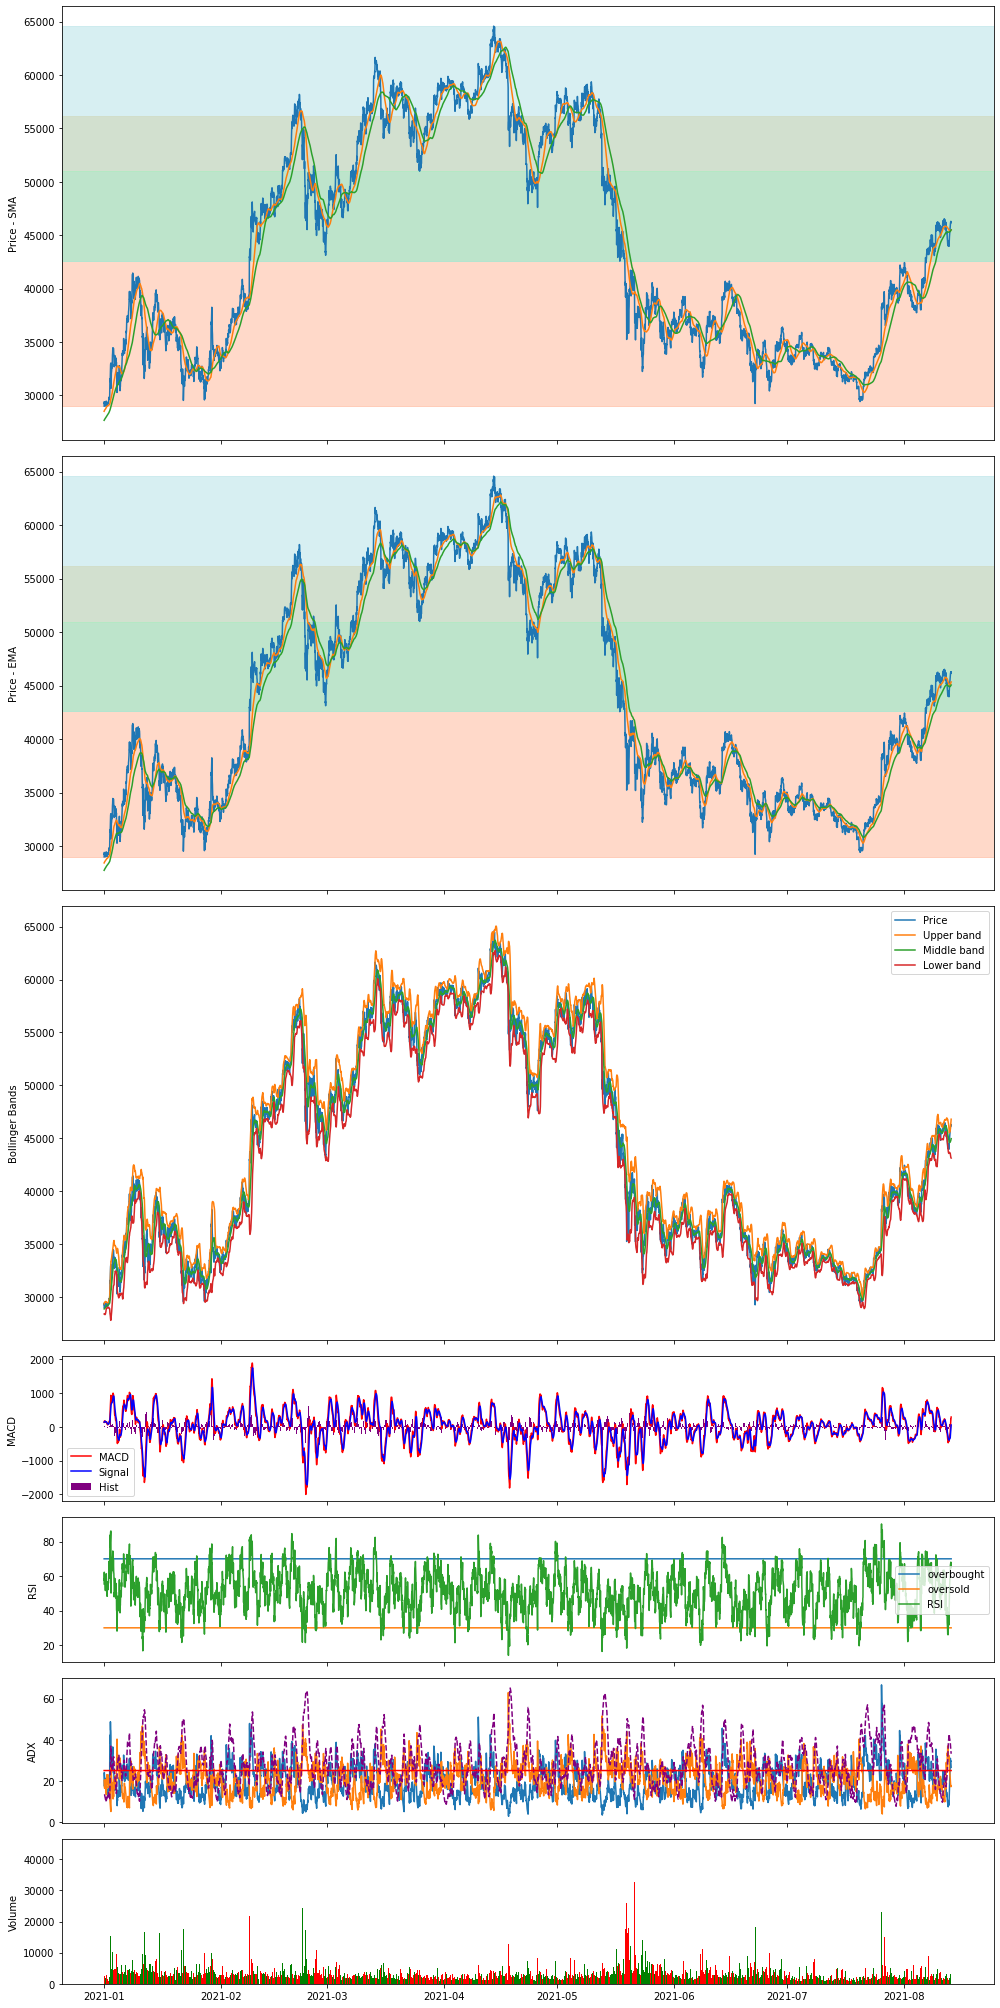

In [15]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(nrows=7, sharex=True, figsize=(14, 28), gridspec_kw = {'height_ratios':[3, 3, 3, 1, 1, 1, 1]})

# Price x SMA
ax1.plot(data.index, data[['ClosePrice', 'SMA50', 'SMA100']])
# Fibonacci retracement
ax1.axhspan(fib_levels['level1'], fib_levels['price_min'], alpha=0.4, color='lightsalmon')
ax1.axhspan(fib_levels['level2'], fib_levels['level1'], alpha=0.5, color='palegoldenrod')
ax1.axhspan(fib_levels['level3'], fib_levels['level2'], alpha=0.5, color='palegreen')
ax1.axhspan(fib_levels['price_max'], fib_levels['level3'], alpha=0.5, color='powderblue')
ax1.set_ylabel('Price - SMA')

# Price x EMA
ax2.plot(data.index, data[['ClosePrice', 'EMA50', 'EMA100']])
# Fibonacci retracement
ax2.axhspan(fib_levels['level1'], fib_levels['price_min'], alpha=0.4, color='lightsalmon')
ax2.axhspan(fib_levels['level2'], fib_levels['level1'], alpha=0.5, color='palegoldenrod')
ax2.axhspan(fib_levels['level3'], fib_levels['level2'], alpha=0.5, color='palegreen')
ax2.axhspan(fib_levels['price_max'], fib_levels['level3'], alpha=0.5, color='powderblue')
ax2.set_ylabel('Price - EMA')

# Bollinger Bands
ax3.plot(data['ClosePrice'], label='Price')
ax3.plot(data['UpperBBand'], label='Upper band')
ax3.plot(data['MidiBBand'], label='Middle band')
ax3.plot(data['LowerBBand'], label='Lower band')
ax3.legend()
ax3.set_ylabel('Bollinger Bands')

# MACD
ax4.plot(data.index, data['MACD'], label='MACD', color = 'red')
ax4.bar(data.index, data['MACDHist'], label='Hist', color="purple", width = timedelta(hours=1))
ax4.plot(data.index, data['MACDSignal'], label='Signal', color='blue')
ax4.legend()
ax4.set_ylabel('MACD')

# RSI
ax5.plot(data.index, [70] * len(data.index), label='overbought')
ax5.plot(data.index, [30] * len(data.index), label='oversold')
ax5.plot(data.index, data['RSI'], label='RSI')
ax5.legend()
ax5.set_ylabel('RSI')

# ADX
ax6.plot(data.index, data[['DI+', 'DI-']])
ax6.plot(data.index, data[['ADX']], color='purple', linestyle='dashed')
ax6.plot(data.index, [25] * len(data.index), color = 'red')
ax6.set_ylabel('ADX')

# Volume
# make bar plots and color differently depending on up/down for the day
pos = data['OpenPrice'] - data['ClosePrice'] < 0
neg = data['OpenPrice'] - data['ClosePrice'] > 0
ax7.bar(data.index[pos], data[pos]['Volume'], color='green', width = timedelta(hours=1))
ax7.bar(data.index[neg], data[neg]['Volume'], color='red', width = timedelta(hours=1))

#ax7.bar(data.index, data['Volume'] / 1000000, width = timedelta(hours=4))
ax7.set_ylabel('Volume')

fig.tight_layout()

## Backtest Strategy

In [16]:
import bt

# Get the price data
price_data = data[['ClosePrice']].copy()

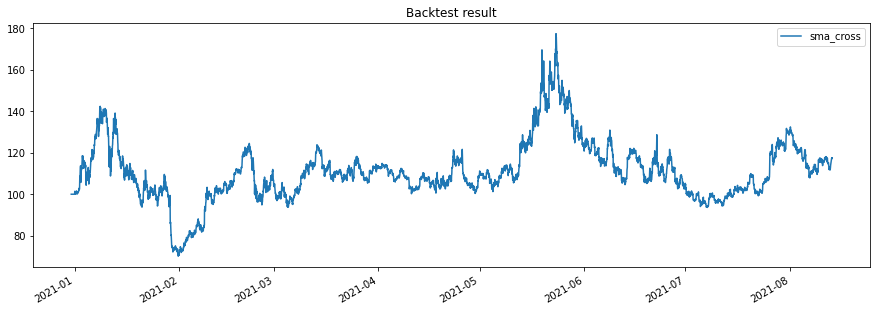

In [17]:
from backtest_utils import get_cross_signal, signal_strategy

signal = get_cross_signal(data[['SMA50']].copy(), data[['SMA200']].copy())
bt_sma_cross = signal_strategy(price_data.copy(), signal, 'sma_cross')

bt_result = bt.run(bt_sma_cross)
# Plot the backtest result
bt_result.plot(title='Backtest result')
plt.show()

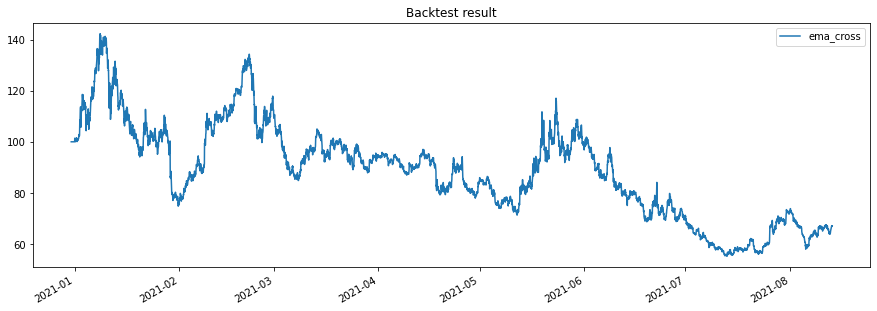

In [18]:
from backtest_utils import get_cross_signal, signal_strategy

signal = get_cross_signal(data[['EMA50']].copy(), data[['EMA200']].copy())
bt_ema_cross = signal_strategy(price_data.copy(), signal, 'ema_cross')

bt_result = bt.run(bt_ema_cross)
# Plot the backtest result
bt_result.plot(title='Backtest result')
plt.show()

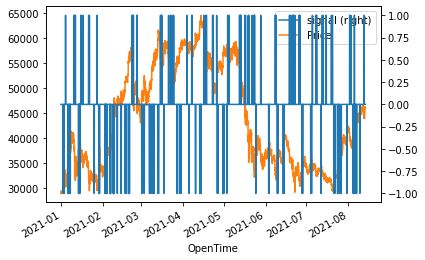

In [19]:
from backtest_utils import get_rsi_signal, signal_strategy

signal = get_rsi_signal(data[['RSI']].copy())

# Merge the data
combined_df = bt.merge(signal, price_data)
combined_df.columns = ['signal', 'Price']
combined_df.plot(secondary_y=['signal'])
plt.show()

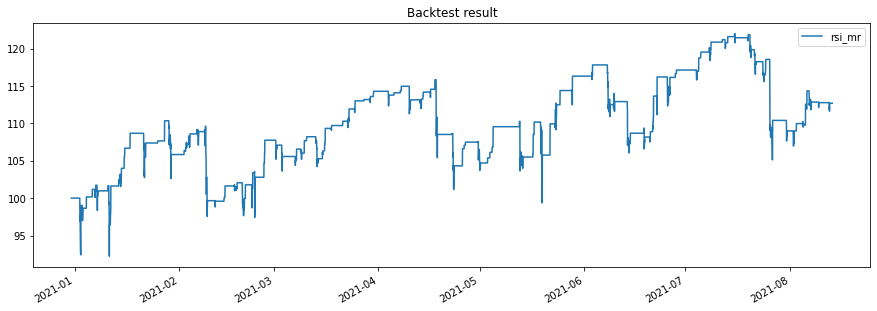

In [20]:
bt_rsi = signal_strategy(price_data.copy(), signal, 'rsi_mr')

bt_result = bt.run(bt_rsi)
# Plot the backtest result
bt_result.plot(title='Backtest result')
plt.show()

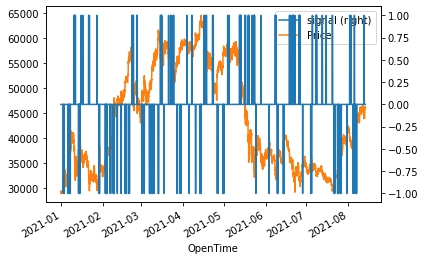

In [21]:
from backtest_utils import get_rsi_adx_signal, signal_strategy

signal = get_rsi_adx_signal(data[['RSI']].copy(), data[['ADX']])

# Merge the data
combined_df = bt.merge(signal, price_data)
combined_df.columns = ['signal', 'Price']
combined_df.plot(secondary_y=['signal'])
plt.show()

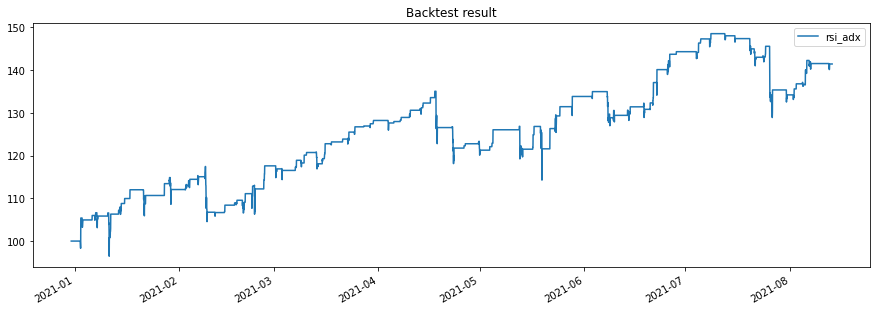

In [22]:
bt_rsi_adx = signal_strategy(price_data.copy(), signal, 'rsi_adx')

bt_result = bt.run(bt_rsi_adx)
# Plot the backtest result
bt_result.plot(title='Backtest result')
plt.show()

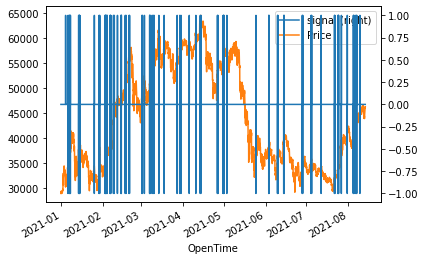

In [23]:
from backtest_utils import get_rsi_plus_signal, signal_strategy

signal = get_rsi_plus_signal(data[['RSI']].copy())

# Merge the data
combined_df = bt.merge(signal, price_data)
combined_df.columns = ['signal', 'Price']
combined_df.plot(secondary_y=['signal'])
plt.show()

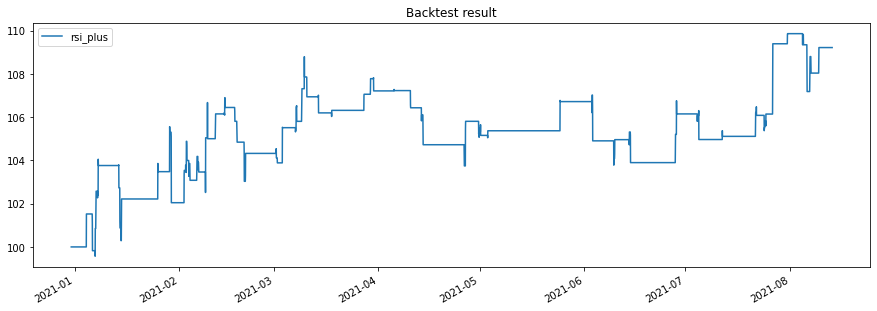

In [24]:
bt_rsi_plus = signal_strategy(price_data.copy(), signal, 'rsi_plus')

bt_result = bt.run(bt_rsi_plus)
# Plot the backtest result
bt_result.plot(title='Backtest result')
plt.show()

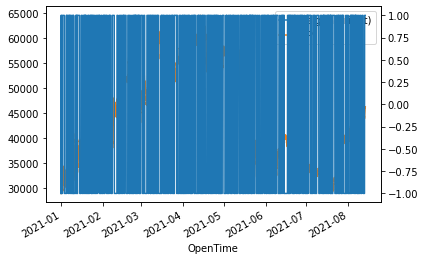

In [25]:
from backtest_utils import get_macd_signal, signal_strategy

signal = get_macd_signal(data[['MACDSignal']].copy(), data[['MACD']].copy())

# Merge the data
combined_df = bt.merge(signal, price_data)
combined_df.columns = ['signal', 'Price']
combined_df.plot(secondary_y=['signal'])
plt.show()

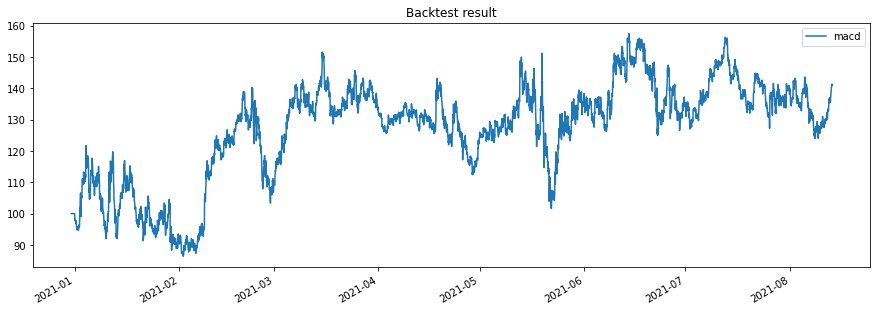

In [26]:
bt_macd = signal_strategy(price_data.copy(), signal, 'macd')

bt_result = bt.run(bt_macd)
# Plot the backtest result
bt_result.plot(title='Backtest result')
plt.show()

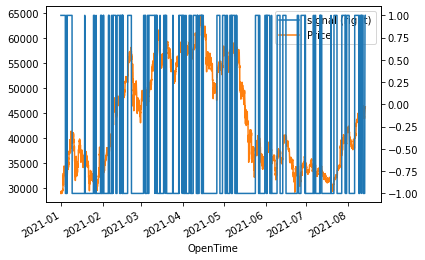

In [27]:
from backtest_utils import get_sma_macd_signal, signal_strategy

signal = get_sma_macd_signal(data[['ClosePrice']].copy(), data[['SMA50']].copy(), data[['SMA100']].copy(), data[['MACD']].copy())

# Merge the data
combined_df = bt.merge(signal, price_data)
combined_df.columns = ['signal', 'Price']
combined_df.plot(secondary_y=['signal'])
plt.show()

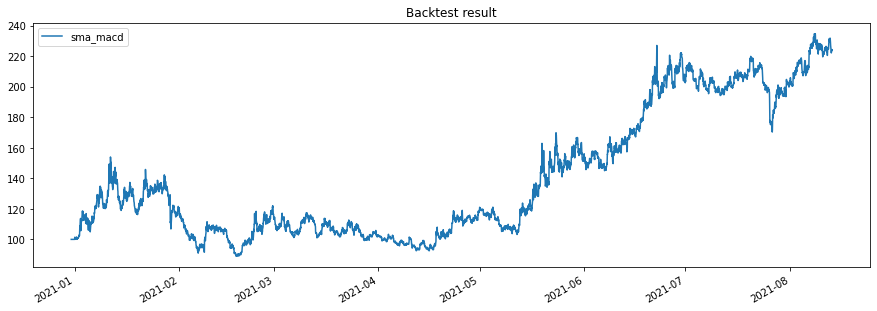

In [28]:
bt_sma_macd = signal_strategy(price_data.copy(), signal, 'sma_macd')

bt_result = bt.run(bt_sma_macd)
# Plot the backtest result
bt_result.plot(title='Backtest result')
plt.show()

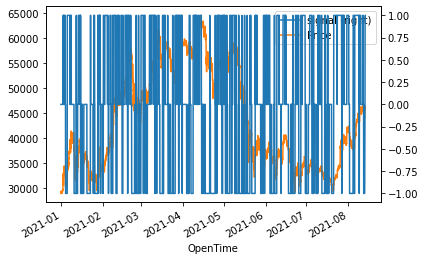

In [29]:
from backtest_utils import get_adx_macd_signal, signal_strategy

signal = get_adx_macd_signal(data[['MACD']].copy(), data[['DI+']].copy(), data[['DI-']].copy(), data[['ADX']].copy())

# Merge the data
combined_df = bt.merge(signal, price_data)
combined_df.columns = ['signal', 'Price']
combined_df.plot(secondary_y=['signal'])
plt.show()

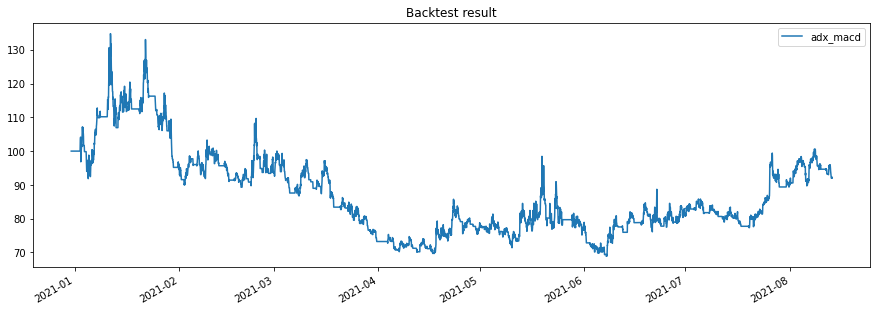

In [30]:
bt_adx_macd = signal_strategy(price_data.copy(), signal, 'adx_macd')

bt_result = bt.run(bt_adx_macd)
# Plot the backtest result
bt_result.plot(title='Backtest result')
plt.show()

In [31]:
from backtest_utils import signal_above_strategy, buy_and_hold_strategy

# Create signal strategy backtest
bt_sma5 = signal_above_strategy(price_data.copy(), data[['SMA5']].copy(), name='SMA5')
bt_sma10 = signal_above_strategy(price_data.copy(), data[['SMA10']].copy(), name='SMA10')
bt_sma20 = signal_above_strategy(price_data.copy(), data[['SMA20']].copy(), name='SMA20')
bt_sma30 = signal_above_strategy(price_data.copy(), data[['SMA30']].copy(), name='SMA30')
bt_sma50 = signal_above_strategy(price_data.copy(), data[['SMA50']].copy(), name='SMA50')
bt_sma100 = signal_above_strategy(price_data.copy(), data[['SMA100']].copy(), name='SMA100')

# Create benchmark strategy backtest
bt_benchmark = buy_and_hold_strategy(price_data.copy(), name='benchmark')

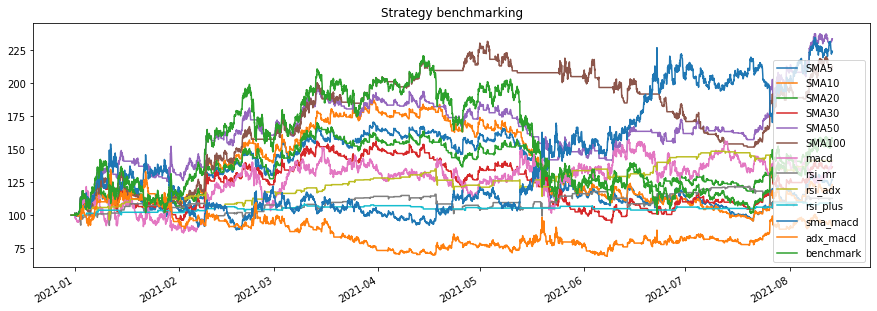

In [32]:
# Run all backtests and plot the resutls
bt_results = bt.run(bt_sma5,bt_sma10, bt_sma20, bt_sma30, bt_sma50, bt_sma100, bt_macd, bt_rsi, bt_rsi_adx, bt_rsi_plus, bt_sma_macd, bt_adx_macd, bt_benchmark)
#bt_results = bt.run(bt_rsi, bt_sma50, bt_benchmark)
bt_results.plot(title='Strategy benchmarking')
plt.show()

In [33]:
bt_results.display()

Stat                 SMA5        SMA10       SMA20       SMA30       SMA50       SMA100      macd        rsi_mr      rsi_adx     rsi_plus    sma_macd    adx_macd    benchmark
-------------------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  -----------
Start                2020-12-31  2020-12-31  2020-12-31  2020-12-31  2020-12-31  2020-12-31  2020-12-31  2020-12-31  2020-12-31  2020-12-31  2020-12-31  2020-12-31  2020-12-31
End                  2021-08-13  2021-08-13  2021-08-13  2021-08-13  2021-08-13  2021-08-13  2021-08-13  2021-08-13  2021-08-13  2021-08-13  2021-08-13  2021-08-13  2021-08-13
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         26.89%      23.06%      56.28%      36.63%      133.63%     112.83%     41.17%      12.70%      41.43% 

In [34]:
# Obtain all backtest stats
resInfo = bt_results.stats
ordered_strategies = resInfo.loc['total_return'].sort_values(ascending=False)
print(ordered_strategies)

best_strategy = ''
if resInfo.loc['total_return'].sort_values(ascending=False).index[0] == 'benchmark':
    best_strategy = resInfo.loc['total_return'].sort_values(ascending=False).index[1]
else:
    best_strategy = resInfo.loc['total_return'].sort_values(ascending=False).index[0]

bt_best = bt_results.backtests[best_strategy]

SMA50        1.336312
sma_macd     1.242728
SMA100       1.128334
benchmark    0.587043
SMA20        0.562849
rsi_adx      0.414341
macd         0.411747
SMA30        0.366341
SMA5         0.268896
SMA10        0.230567
rsi_mr       0.126976
rsi_plus     0.092155
adx_macd    -0.078074
Name: total_return, dtype: object


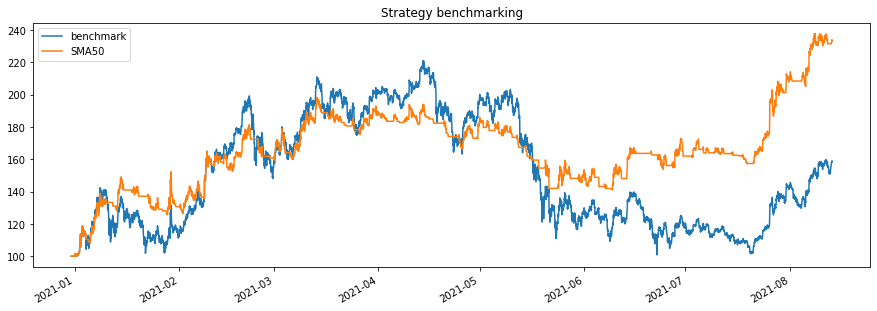

In [35]:
bt_results_best = bt.run(bt_benchmark, bt_best)
bt_results_best.plot(title='Strategy benchmarking')
plt.show()

In [36]:
bt_results_best.get_transactions(strategy_name=best_strategy)

price  quantity
Date                Security                    
2021-01-01 00:00:00 value     28995.13      34.0
2021-01-04 07:00:00 value     32068.84     -34.0
2021-01-05 01:00:00 value     32786.06      33.0
2021-01-05 02:00:00 value     32306.64     -33.0
2021-01-05 14:00:00 value     32342.33      33.0
...                                ...       ...
2021-08-10 17:00:00 value     45095.99      51.0
2021-08-11 22:00:00 value     45756.69     -51.0
2021-08-12 01:00:00 value     46000.00      50.0
2021-08-12 04:00:00 value     45588.95     -50.0
2021-08-13 06:00:00 value     45833.34      50.0

[365 rows x 2 columns]

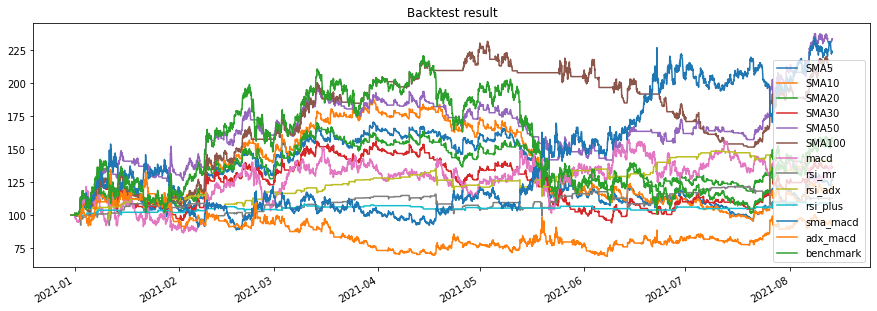

          SMA5    SMA10    SMA20   SMA30    SMA50   SMA100    macd  rsi_mr  \
mtd      7.90%    6.29%    9.95%   9.59%   11.62%    9.34%   0.96%   3.40%   
3m     -14.38%  -20.14%    2.47%   4.17%   39.60%    2.27%  -0.00%   6.82%   
6m      -3.45%   -9.16%   17.98%   9.00%   47.65%   49.58%  19.32%  13.16%   
ytd     26.89%   23.06%   56.28%  36.63%  133.63%  112.83%  41.17%  12.70%   
1y        nan%     nan%     nan%    nan%     nan%     nan%    nan%    nan%   
3y        nan%     nan%     nan%    nan%     nan%     nan%    nan%    nan%   
5y        nan%     nan%     nan%    nan%     nan%     nan%    nan%    nan%   
10y       nan%     nan%     nan%    nan%     nan%     nan%    nan%    nan%   
incep   47.20%   40.05%  106.44%  65.98%  296.50%  240.81%  75.03%  21.42%   

      rsi_adx rsi_plus sma_macd adx_macd benchmark  
mtd     5.39%   -0.59%   11.43%    2.47%    11.46%  
3m     16.41%    3.65%   88.33%   13.44%    -6.81%  
6m     32.59%    2.89%  112.34%   -3.63%    -1.88%  
ytd    

In [37]:
# Plot the backtest result
bt_results.plot(title='Backtest result')
plt.show()

# Get the lookback returns
lookback_returns = bt_results.display_lookback_returns()
print(lookback_returns)

# Tests

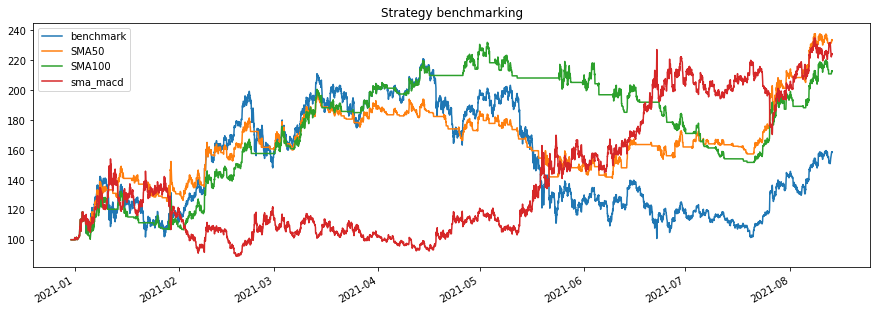

In [38]:
bt_results_test = bt.run(bt_benchmark, bt_sma50, bt_sma100, bt_sma_macd)
bt_results_test.plot(title='Strategy benchmarking')
plt.show()